# 과대적합과 과소적합
이전의 영화리뷰 분류, 뉴스기사 분류, 세가지 예제에서 모델의 성능이 몇번째 에포크 이후에 최고치에 다다랐다가 감소하기 시작했다.  
즉, 모델이 과대 적합되기 시작한 것이다. 머신러닝에서는 과대적합을 다룰 줄 알아야 한다.

## 최적화와 일반화
 - 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻기위해 모델을 조정하는 과정이다.(머신러닝의 학습).  
 - 반면 일반화는 훈련된 모델이 이전에 본 적없는 데이터에서 얼마나 잘 수행되는지를 의미한다.
 - 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것인데, 일반화 성능을 직접적으로 제어할 방법이 없고 훈련데이터를 기반으로 모델을 조정할 수 있다.  

## 과소적합, 과대적합
 - 훈련 초기에는 최적화와 일반화가 상호연관되어 있다. **훈련데이터의 손실이 낮을 수록 데이터의 손실이 낮은데, 이런 증상을 과소적합되었다라고 말한다.** 네트워크가 훈련 데이터에 있는 관련 특성을 모두 학습하지 못했기 때문에 모델의 성능이 계속 발전될 여지가 있다. 
 - 하지만 훈련데이터에 여러번 반복학습하고 나면 어느시점부터 일반화 성능이 더이상 높아지지 않는다. **검증세트의 성능이 멈추고 감소되기 시작하는데 이런 증상을 과대적합되었다 라고 말한다**. 이는 훈련데이터에 특화된 패턴을 모델이 학습하기 시작했다는 의미이며, 새로운 데이터에 대해 잘못된 판단을 할 확률이 높아진다.

## 과소적합, 과대적합을 피하려면..
- 모델이 관련성이 없고 좋지 못한 패턴을 학습하지 못하도록 하기 위한 방법은 더 많은 훈련 데이터를 모으는 것이다. 당연한 얘기지만, 더 많은 데이터에서 훈련된 모델은 일반화 성능이 더 뛰어나다.
- **데이터를 더 모으는 것이 불가능할 때, 차선책은 모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약을 가하는 것**이다. 네트워크가 **적은 수의 패턴**만을 기억할 수 있다면, 가장 중요한 패턴에 집중하게 될 것이고 이런 패턴은 더 나은 일반화 성능을 제공할 수 있다.

## 데이터 준비
IMDB 데이터 세트를 이용해서 확인해보자.

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만든다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

# 훈련데이터를 벡터로 변환한다.
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환한다.
x_test = vectorize_sequences(test_data)
#레이블을 벡터로 변한한다.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 과대적합을 피하기 위한 방법
### 1.네트워크 크기 축소
 - **과대적합을 막는 가장 단순한 방법은 모델의 크기, 즉 모델에 있는 학습 파라미터의 수를 줄이는 것**이다.
 - 파라미터의 수는 **층의 수와 각 층의 유닛 수**에 의해 결정된다. 딥러닝에서 모델에 있는 학습 파라미터의 수를 용량이라고 한다. 그리고 당연하게 파라미터가 많은 모델이 기억용량이 더 많다.
 - 딥러닝 모델은 훈련데이터에 잘 맞으려는 경향을 가진다. 이 문제는 최적화가 아니라 일반화이다.
 - 결국, 과대적합을 피하고 일반화를 하기위해서는 알맞은 층의 수나 각 층의 유닛수를 결정하면 된다. 그런데, 알맞은 층의 수나 각 층의 유닛 수를 결정할 수 있는 마법같은 공식은 없다. **데이터에 알맞는 모델 크기를 찾으려면 각기 다른 구조를 평가해보면서 알맞은 층의 수나 유닛 수를 조절해나가야한다.**
 - **일반적으로 비교적 작은 층과 파라미터로 시작해서 검증 손실이 감소되기 시작할때까지 유닛의 수를 늘리는 것이다.**
 
이렇게 네트워크 크기를 축소해서 과대적합 문제를 해결하는 과정을 예제로 살펴보자.

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

더 작은 네트워크로 바꿔보자.

In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

원본 네트워크와 축소된 네트워크의 검증손실을 비교해보자.  
점으로 표현된 것이 작은 네트워크이고 덧셈기호가 원래 네트워크이다.  
(검증 손실이 작은 것이 좋은 모델이다..

In [8]:
original_hist = original_model.fit(x_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.4440 - acc: 0.8251 - val_loss: 0.3286 - val_acc: 0.8835
Epoch 2/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2573 - acc: 0.9078 - val_loss: 0.2864 - val_acc: 0.8882
Epoch 3/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.1991 - acc: 0.9292 - val_loss: 0.2822 - val_acc: 0.8892
Epoch 4/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.1666 - acc: 0.9414 - val_loss: 0.2940 - val_acc: 0.8846
Epoch 5/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.1434 - acc: 0.9502 - val_loss: 0.3115 - val_acc: 0.8807
Epoch 6/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.1257 - acc: 0.9560 - val_loss: 0.3485 - val_acc: 0.8719
Epoch 7/20
25000/25000 [==============================] - 3s 121us/step - loss: 0.1109 - acc: 0.9616 - val_loss: 0.3581 - val

In [9]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.5642 - acc: 0.7422 - val_loss: 0.4789 - val_acc: 0.8314
Epoch 2/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.3865 - acc: 0.8908 - val_loss: 0.3570 - val_acc: 0.8795
Epoch 3/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2763 - acc: 0.9171 - val_loss: 0.3005 - val_acc: 0.8877
Epoch 4/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.2208 - acc: 0.9282 - val_loss: 0.2828 - val_acc: 0.8895
Epoch 5/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.1883 - acc: 0.9373 - val_loss: 0.2815 - val_acc: 0.8868
Epoch 6/20
25000/25000 [==============================] - 3s 100us/step - loss: 0.1658 - acc: 0.9450 - val_loss: 0.2850 - val_acc: 0.8848
Epoch 7/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.1478 - acc: 0.9514 - val_loss: 0.2940 - va

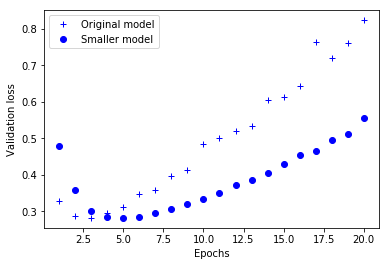

In [17]:
epochs=range(1,21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

import matplotlib.pyplot as plt
# 'b+'는 파란색 덧셈 기호를 의미한다.
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# 'bo'는 파란색 점을 의미합니다.
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

위의 그래프에서 볼 수 있듯이 기본네트워크는 4번째 에포크에서 과대적합되고 있고, 작은 네트워크는 6번째 에포크에서 과대적합되고 있다. 즉, 작은 네트워크가 기본 네트워크보다 더 나중에 과대적합되기 시작하고 있다.  

이번에는 필요한 것보다 많은 용량을 가진 네트워크를 비교해보자.

In [18]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['acc'])

bigger_model_hist = bigger_model.fit(x_train, y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.5504 - acc: 0.7868 - val_loss: 0.2882 - val_acc: 0.8812
Epoch 2/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2200 - acc: 0.9124 - val_loss: 0.2720 - val_acc: 0.8899
Epoch 3/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.1219 - acc: 0.9592 - val_loss: 0.3644 - val_acc: 0.8777
Epoch 4/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.0713 - acc: 0.9826 - val_loss: 0.4391 - val_acc: 0.8861
Epoch 5/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.0883 - acc: 0.9876 - val_loss: 0.5001 - val_acc: 0.8512
Epoch 6/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6411 - val_acc: 0.8844
Epoch 7/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.1210 - acc: 0.9875 - val_loss: 0.6792 - val_acc

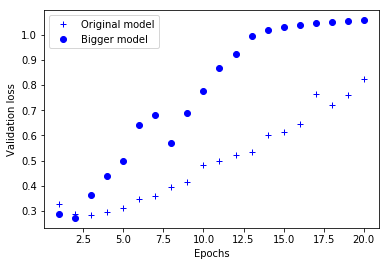

In [19]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

용량이 큰 네트워크는 첫번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해진다.
검증 손실도 매우 불안정하다.
이번에는 두 네트워크의 훈련손실에 대한 그래프를 한번 보자.

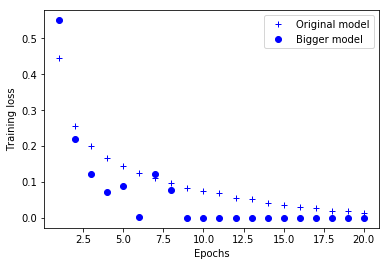

In [20]:
original_train_loss = original_hi`st.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

위 그래프에서 볼 수 있듯이 용량이 큰 네트워크는 훈련 손실이 빠르게 0에 가까워진다.  
용량이 많은 네트워크 일 수록 더 빠르게 훈련 데이터를 모델링할 수 있다.
훈련손실은 낮아지지만 과대적합에는 민감해진다.(결국, 훈련과 검증손실 사이에 큰 차이가 발생한다)

### 2. 가중치 규제 추가
과대적합을 완하하기위한 다른 방법은 네트워크의 복잡도에 제한을 두어서 강제로 가중치가 작은 값을 갖도록 하는 것이다.
이를 통해 가중치 값의 분포가 더 균일하게 되는데, 이 방법을 가중치 규제라고 하고 네트워크 손실 함수에 큰 가중치와 연관된 비용을 추가한다. 비용은 아래의 두가지 형태의 비용이 있다.

 - L1 규제: 가중치의 절대값에 비례하는 비용이 추가된다.(가중치의 L1 노름).
 - L2 규제: 가중치의 제곱에 비례하는 비용이 추가된다. (가중치의 L2 노름). L2 규제는 신경망에서 가중치 감쇠라고도 한다. 가중치 감쇠는 수학적으로 L2규제와 동일하다.

케라스에서는 가중치 규제 인스턴스를 층의 키워드 매개변수로 전달해서 가중치 규제를 할 수 있다. 가중치 규제를 추가해보자.

In [21]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                         activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                         activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

l2(0.001)는 가중치 행렬의 모든 원소를 제곱하고 0.001을 곱해서 네트워크의 전체 손실에 더해진다는 의미다.. 이 페널티 항은 훈련할 때만 추가된다.. 이 네트워크의 손실은 테스트보다 훈련할때 더 높다.
L2규제 페널티의 효과를 확인해보자.

In [23]:
l2_model_hist = l2_model.fit(x_train, y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 168us/step - loss: 0.4880 - acc: 0.8152 - val_loss: 0.3905 - val_acc: 0.8646
Epoch 2/20
25000/25000 [==============================] - 4s 168us/step - loss: 0.3100 - acc: 0.9061 - val_loss: 0.3306 - val_acc: 0.8890
Epoch 3/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.2658 - acc: 0.9200 - val_loss: 0.3306 - val_acc: 0.8870
Epoch 4/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.2459 - acc: 0.9285 - val_loss: 0.3410 - val_acc: 0.8820
Epoch 5/20
25000/25000 [==============================] - 4s 169us/step - loss: 0.2323 - acc: 0.9348 - val_loss: 0.3813 - val_acc: 0.8678
Epoch 6/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.2237 - acc: 0.9390 - val_loss: 0.3663 - val_acc: 0.8751
Epoch 7/20
25000/25000 [==============================] - 4s 173us/step - loss: 0.2171 - acc: 0.9412 - val_loss: 0.3747 - 

그래프에서 볼 수 있듯이 두 모델이 동일한 파라미터를 갖고 있어도 L2규제를 사용한 모델(점)이 기본모델(덧셈기호)보다 더 과대적합에 잘 견디고 있다.
케라스에서는 L2 규제 대신에 아래 같은 가중치 규제 중 하나를 사용할 수도 있다.

In [25]:
from keras import regularizers
# L1 규제
regularizers.l1(0.001)
# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)

### 3. 드롭아웃 추가
- 신경망을 위해 사용되는 규제기법 중에서 가장 효과적이고 널리 사용되는 방법중의 하나이다.
- 네트워크의 층에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 출력 특성을 제외시킨다.  
- 예를 들어, 한 층이 정상적으로 훈련하는 동안에 어떤 입력 샘플에 대해 [0.2, 0.5, 1.3, 0.8, 1.1]벡터를 출력한다고 할때, 드롭아웃을 적용하면 이 벡터의 일부가 무작위로 0으로 바뀌고 [0, 0.5, 1.3, 0, 1.1]이 된다.  
- 드롭아웃 비율이란 0이 될 특성의 비율이고 보통 0.2~0.5 사이로 지정된다.  
- 테스트 단계에서는 어떤 유닛도 드롭아웃되지 않으며, 대신, 층의 출력을 드롭아웃 비율에 비례하여 줄여준다. 훈련할 때보다 더 많은 유닛이 활성화되기 때문이다.

이 기법이 무계획적으로 보일 수 있다.  
이 기법은 은행에서 사용하는 부정방지 메커니즘에서 착안했다고 한다.  
"은행에 갔을 때 행원들이 계속 바뀌길래 왜 그런지를 물었습니다.  
자신들도 이유는 모르지만 자주 업무가 바뀐다고 했다. 나는 은행에서 부정행위를 하려면 직원들 사이의 유대가 필요하기 때문이라고 판단했습니다. 각 샘플에 대해 뉴런의 일부를 무작위하게 제거하면 뉴런의 부정한 협업을 방지하고 결국 과대적합을 감소시킨다는 것을 깨달았다."

핵심 아이디어는 층의 출력 값에 노이즈를 추가해서 중요하지 않은 우연한 패턴(위에서의 부정한 협업)을 깨트리는 것이다. 노이즈가 없다면 네트워크는 이 패턴을 기억하기 시작할 것이다.

케라스에서는 층의 출력 바로 뒤에 Dropout층을 추가해서 네트워크에 드롭아웃을 적용할 수 있다.
~~~python
model.add(layers.Dropout(0.5)
~~~  
IMDB 네트워크에 두개의 Dropout 층을 추가하고 과대적합을 얼마나 줄여주는지 확인해보자.

In [31]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])
dpt_model_hist = dpt_model.fit(x_train, y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 176us/step - loss: 0.5906 - acc: 0.6835 - val_loss: 0.4317 - val_acc: 0.8619
Epoch 2/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.4360 - acc: 0.8181 - val_loss: 0.3481 - val_acc: 0.8704
Epoch 3/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.3472 - acc: 0.8706 - val_loss: 0.2920 - val_acc: 0.8864
Epoch 4/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.2886 - acc: 0.8983 - val_loss: 0.2768 - val_acc: 0.8880
Epoch 5/20
25000/25000 [==============================] - 4s 147us/step - loss: 0.2533 - acc: 0.9135 - val_loss: 0.2798 - val_acc: 0.8882
Epoch 6/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.2222 - acc: 0.9265 - val_loss: 0.2898 - val_acc: 0.8874
Epoch 7/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.1971 - acc: 0.9353 - val_loss: 0.3204 - 

결과 그래프를 그려보자.

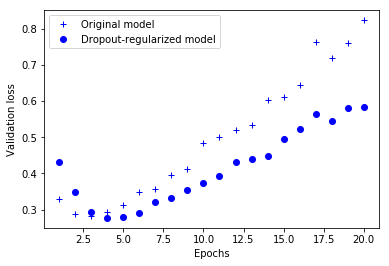

In [33]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기서도 기본 네트워크보다 확실히 향상됬다.
정리하면 신경망에서 과대적합을 방지하기 위해 널리 사용되는 방법은 아래 네가지이다.
 - 훈련 데이터를 더 모은다.
 - 네트워크의 용량을 감소시킨다.
 - 가중치 규제를 추가한다.
 - 드롭아웃을 추가한다.